# Sistemas Inteligentes

## Exercício Computacional 3 - Redução de Dimensionalidade e Regressão

### Identificação do Aluno

#### Nome Completo

Gabriel Murakami Alves

#### RA

11071916

Pesquise por datasets voltados para regressões que estejam disponíveis na biblioteca Scikit, então escolha um para este exercício.

Utilize algum método de redução de dimensionalidade para realizar tal processo, então gere três modelos de regressão com diferentes métodos (um método diferente para cada modelo).

Calcule e exiba métricas que ajudem a conferir a qualidade dos modelos gerados.

Exiba gráficos que auxiliem na visualização dos dados e da curva de regressão.

Compare os modelos e comente os resultados obtidos.

Insira as referências utilizadas ao final.

## Desenvolvimento

In [0]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import numpy as np

boston_dataset = ds.load_boston()
boston_target = boston_dataset.target
boston_data = boston_dataset.data

In [31]:
print(boston_data.shape)
print(boston_target.shape)

(506, 13)
(506,)


In [0]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

In [0]:
pca = PCA(n_components=1)
boston_data_transformed_pca = pca.fit_transform(boston_data)

fastica = FastICA(n_components=1)
boston_data_transformed_ica = fastica.fit_transform(boston_data)

isomap = Isomap(n_components=1)
boston_data_transformed_iso = isomap.fit_transform(boston_data)

In [34]:
print("PCA: " + str(boston_data_transformed_pca.shape))
print("ICA: " + str(boston_data_transformed_ica.shape))
print("Isomap: " + str(boston_data_transformed_iso.shape))

PCA: (506, 1)
ICA: (506, 1)
Isomap: (506, 1)


In [35]:
#Boston PCA LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11,7)

x_train, x_test, y_train, y_test = train_test_split(boston_data_transformed_pca, boston_target, test_size=0.20)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
x_test_boston = x_test
y_test_boston = y_test
y_pred_boston = reg.predict(x_test)

print("MSE: " + str(mean_squared_error(y_test_boston, y_pred_boston)))
print("R2: " + str(r2_score(y_test_boston, y_pred_boston)))

MSE: 59.707363712593285
R2: 0.21186210085085444


No handles with labels found to put in legend.


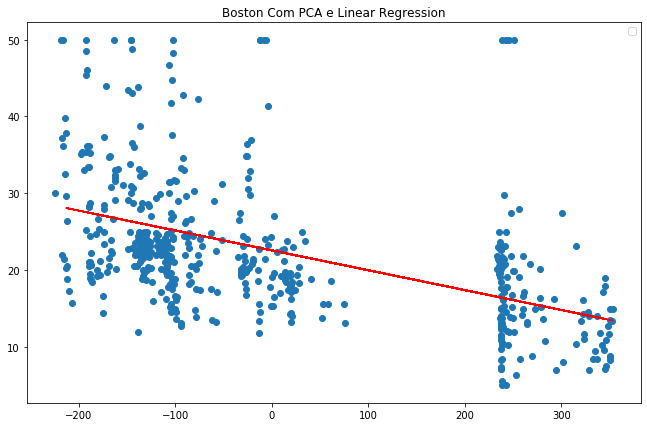

In [36]:
plt.scatter(boston_data_transformed_pca, boston_target)
plt.plot(x_test_boston, y_pred_boston, color="red")
plt.title("Boston Com PCA e Linear Regression")
plt.legend()
plt.show()

In [37]:
#Boston FastICA Ridge 
x_train, x_test, y_train, y_test = train_test_split(boston_data_transformed_ica, boston_target, test_size=0.20)

rid = linear_model.Ridge(alpha=1.0)
rid.fit(x_train, y_train)
x_test_boston = x_test
y_test_boston = y_test
y_pred_boston = rid.predict(x_test)

print("MSE: " + str(mean_squared_error(y_test_boston, y_pred_boston)))
print("R2: " + str(r2_score(y_test_boston, y_pred_boston)))

MSE: 90.73063047529676
R2: 0.0932456353389165


No handles with labels found to put in legend.


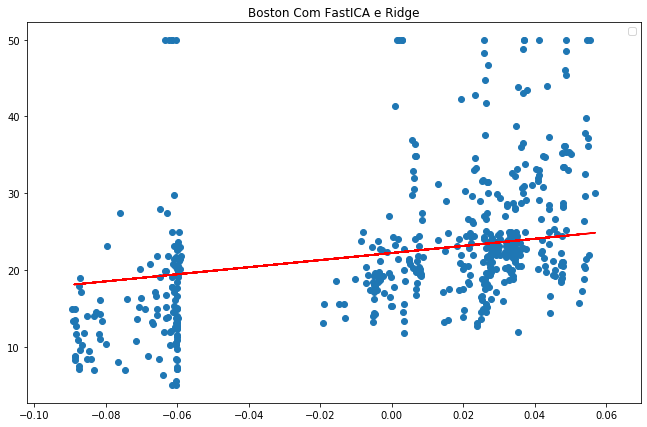

In [38]:
plt.scatter(boston_data_transformed_ica, boston_target)
plt.plot(x_test_boston, y_pred_boston, color="red")
plt.title("Boston Com FastICA e Ridge")
plt.legend()
plt.show()

In [39]:
#Boston Isomap LassoLars
x_train, x_test, y_train, y_test = train_test_split(boston_data_transformed_iso, boston_target, test_size=0.20)

lassolars = linear_model.LassoLars(alpha=1.0)
lassolars.fit(x_train, y_train)
x_test_boston = x_test
y_test_boston = y_test
y_pred_boston = lassolars.predict(x_test)

print("MSE: " + str(mean_squared_error(y_test_boston, y_pred_boston)))
print("R2: " + str(r2_score(y_test_boston, y_pred_boston)))

MSE: 76.32532742728992
R2: -0.03601000265969678


No handles with labels found to put in legend.


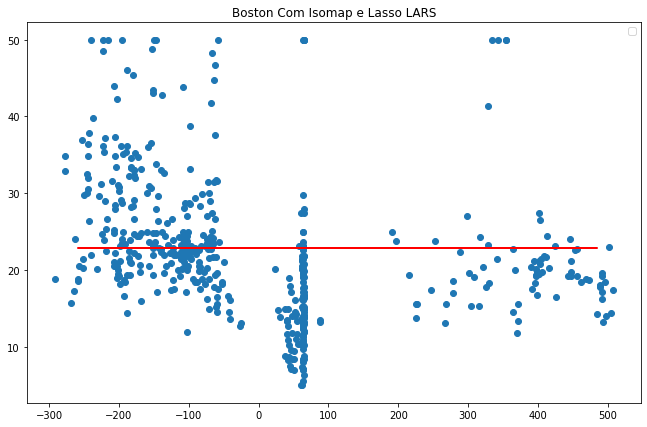

In [40]:
plt.scatter(boston_data_transformed_iso, boston_target)
plt.plot(x_test_boston, y_pred_boston, color="red")
plt.title("Boston Com Isomap e Lasso LARS")
plt.legend()
plt.show()

Referências:
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston">Boston</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes">Diabetes</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud">Linnerud</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html#sklearn.linear_model.LassoLars">LassoLars</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html">Isomap</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html">FastICA</a>
<br>
<a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA</a>
